<a href="https://colab.research.google.com/github/floak/kaggle-weather-forecasting/blob/main/kaggletrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_array
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
cdata = pd.read_csv('train.csv')

In [ ]:
cdata

,SNo,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,...,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time,Label
0,1,21.707953,275.0000,78.909431,-58.805229,36.200672,-58.260475,-0.722955,0.022321,97497.79688,...,227.119232,273.045563,1.390000e-05,302.350861,300.026764,66.339836,12400.22754,66.241585,20031024,1
1,2,21.707953,275.0000,78.909431,-58.805229,36.200672,-58.260475,-0.722955,0.022321,97497.79688,...,227.119232,273.045563,1.390000e-05,302.350861,300.026764,66.339836,12400.22754,66.241585,20031024,1
2,3,21.473272,275.0000,80.641357,-42.340290,58.060246,-56.400234,26.484743,0.022204,96611.60156,...,229.172897,273.580810,1.440000e-05,302.350861,299.798828,66.165573,12371.33203,66.165268,20031024,1
3,4,21.473272,275.0000,80.641357,-42.340290,58.060246,-56.400234,26.484743,0.022204,96611.60156,...,229.172897,273.580810,1.440000e-05,302.350861,299.798828,66.165573,12371.33203,66.165268,20031024,1
4,5,21.707953,275.3125,76.891205,-45.996342,42.691631,-48.993065,10.246445,0.022328,98168.55469,...,224.642563,272.152283,9.890000e-06,302.462708,300.160187,66.880089,12386.88574,66.275246,20031024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44755,44756,13.494133,253.7500,58.471558,26.397322,5.664860,30.215387,1.547393,0.021974,98739.55469,...,217.845352,272.109589,1.120000e-07,301.878662,300.574646,66.438522,12340.96973,66.438522,20011207,1
44756,44757,13.494133,253.7500,58.471558,26.397322,5.664860,30.215387,1.547393,0.021974,98739.55469,...,217.845352,272.109589,1.120000e-07,301.878662,300.574646,66.438522,12340.96973,66.438522,20011207,0
44757,44758,13.494133,253.7500,58.471558,26.397322,5.664860,30.215387,1.547393,0.021974,98739.55469,...,217.845352,272.109589,1.120000e-07,301.878662,300.574646,66.438522,12340.96973,66.438522,20011207,1
44758,44759,13.494133,253.7500,58.471558,26.397322,5.664860,30.215387,1.547393,0.021974,98739.55469,...,217.845352,272.109589,1.120000e-07,301.878662,300.574646,66.438522,12340.96973,66.438522,20011207,1


In [ ]:
cdatan = cdata.drop(columns=["SNo"])

cdatan = cdatan.drop_duplicates()
cdatan

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time,Label
0,21.707953,275.0000,78.909431,-58.805229,36.200672,-58.260475,-0.722955,0.022321,97497.79688,97498.90625,227.119232,273.045563,1.390000e-05,302.350861,300.026764,66.339836,12400.22754,66.241585,20031024,1
2,21.473272,275.0000,80.641357,-42.340290,58.060246,-56.400234,26.484743,0.022204,96611.60156,96611.60156,229.172897,273.580810,1.440000e-05,302.350861,299.798828,66.165573,12371.33203,66.165268,20031024,1
4,21.707953,275.3125,76.891205,-45.996342,42.691631,-48.993065,10.246445,0.022328,98168.55469,98175.43750,224.642563,272.152283,9.890000e-06,302.462708,300.160187,66.880089,12386.88574,66.275246,20031024,1
6,21.473272,275.3125,76.771362,-33.228142,57.195755,-46.387169,25.953285,0.022245,97758.07031,97758.10938,225.363648,271.941498,9.270000e-06,302.462708,300.021759,66.232269,12359.41309,66.228661,20031024,1
8,21.707953,275.6250,74.268501,-37.684723,42.142948,-41.747562,14.927589,0.022106,98841.56250,98852.13281,222.947571,271.887268,7.160000e-06,302.462708,300.101929,67.174088,12392.40234,66.251289,20031024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44741,13.494133,253.7500,73.321968,21.677361,-22.360260,27.409748,-1.814677,0.019768,100134.93750,100134.93750,220.888092,270.320007,1.410000e-05,301.428863,298.425842,65.764488,12476.83887,65.764488,20000629,1
44742,13.259452,253.7500,57.735180,29.336315,3.866159,30.041025,6.957835,0.021593,99285.27344,99285.27344,218.439926,270.495758,1.200000e-07,301.878662,300.797058,66.483833,12338.07715,66.483833,20011207,0
44743,13.259452,253.7500,57.735180,29.336315,3.866159,30.041025,6.957835,0.021593,99285.27344,99285.27344,218.439926,270.495758,1.200000e-07,301.878662,300.797058,66.483833,12338.07715,66.483833,20011207,1
44751,13.494133,253.7500,58.471558,26.397322,5.664860,30.215387,1.547393,0.021974,98739.55469,98739.55469,217.845352,272.109589,1.120000e-07,301.878662,300.574646,66.438522,12340.96973,66.438522,20011207,1


In [ ]:
cdatan['time'] = pd.to_datetime(cdatan['time'], format='%Y%m%d')
cdatan["time"] = cdatan["time"].dt.month
cdatan

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time,Label
0,21.707953,275.0000,78.909431,-58.805229,36.200672,-58.260475,-0.722955,0.022321,97497.79688,97498.90625,227.119232,273.045563,1.390000e-05,302.350861,300.026764,66.339836,12400.22754,66.241585,10,1
2,21.473272,275.0000,80.641357,-42.340290,58.060246,-56.400234,26.484743,0.022204,96611.60156,96611.60156,229.172897,273.580810,1.440000e-05,302.350861,299.798828,66.165573,12371.33203,66.165268,10,1
4,21.707953,275.3125,76.891205,-45.996342,42.691631,-48.993065,10.246445,0.022328,98168.55469,98175.43750,224.642563,272.152283,9.890000e-06,302.462708,300.160187,66.880089,12386.88574,66.275246,10,1
6,21.473272,275.3125,76.771362,-33.228142,57.195755,-46.387169,25.953285,0.022245,97758.07031,97758.10938,225.363648,271.941498,9.270000e-06,302.462708,300.021759,66.232269,12359.41309,66.228661,10,1
8,21.707953,275.6250,74.268501,-37.684723,42.142948,-41.747562,14.927589,0.022106,98841.56250,98852.13281,222.947571,271.887268,7.160000e-06,302.462708,300.101929,67.174088,12392.40234,66.251289,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44741,13.494133,253.7500,73.321968,21.677361,-22.360260,27.409748,-1.814677,0.019768,100134.93750,100134.93750,220.888092,270.320007,1.410000e-05,301.428863,298.425842,65.764488,12476.83887,65.764488,6,1
44742,13.259452,253.7500,57.735180,29.336315,3.866159,30.041025,6.957835,0.021593,99285.27344,99285.27344,218.439926,270.495758,1.200000e-07,301.878662,300.797058,66.483833,12338.07715,66.483833,12,0
44743,13.259452,253.7500,57.735180,29.336315,3.866159,30.041025,6.957835,0.021593,99285.27344,99285.27344,218.439926,270.495758,1.200000e-07,301.878662,300.797058,66.483833,12338.07715,66.483833,12,1
44751,13.494133,253.7500,58.471558,26.397322,5.664860,30.215387,1.547393,0.021974,98739.55469,98739.55469,217.845352,272.109589,1.120000e-07,301.878662,300.574646,66.438522,12340.96973,66.438522,12,1


In [ ]:
trainY = cdatan['Label']

In [ ]:
cdatanx = cdatan.drop(columns=["Label"])
cdatanx

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time
0,21.707953,275.0000,78.909431,-58.805229,36.200672,-58.260475,-0.722955,0.022321,97497.79688,97498.90625,227.119232,273.045563,1.390000e-05,302.350861,300.026764,66.339836,12400.22754,66.241585,10
2,21.473272,275.0000,80.641357,-42.340290,58.060246,-56.400234,26.484743,0.022204,96611.60156,96611.60156,229.172897,273.580810,1.440000e-05,302.350861,299.798828,66.165573,12371.33203,66.165268,10
4,21.707953,275.3125,76.891205,-45.996342,42.691631,-48.993065,10.246445,0.022328,98168.55469,98175.43750,224.642563,272.152283,9.890000e-06,302.462708,300.160187,66.880089,12386.88574,66.275246,10
6,21.473272,275.3125,76.771362,-33.228142,57.195755,-46.387169,25.953285,0.022245,97758.07031,97758.10938,225.363648,271.941498,9.270000e-06,302.462708,300.021759,66.232269,12359.41309,66.228661,10
8,21.707953,275.6250,74.268501,-37.684723,42.142948,-41.747562,14.927589,0.022106,98841.56250,98852.13281,222.947571,271.887268,7.160000e-06,302.462708,300.101929,67.174088,12392.40234,66.251289,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44741,13.494133,253.7500,73.321968,21.677361,-22.360260,27.409748,-1.814677,0.019768,100134.93750,100134.93750,220.888092,270.320007,1.410000e-05,301.428863,298.425842,65.764488,12476.83887,65.764488,6
44742,13.259452,253.7500,57.735180,29.336315,3.866159,30.041025,6.957835,0.021593,99285.27344,99285.27344,218.439926,270.495758,1.200000e-07,301.878662,300.797058,66.483833,12338.07715,66.483833,12
44743,13.259452,253.7500,57.735180,29.336315,3.866159,30.041025,6.957835,0.021593,99285.27344,99285.27344,218.439926,270.495758,1.200000e-07,301.878662,300.797058,66.483833,12338.07715,66.483833,12
44751,13.494133,253.7500,58.471558,26.397322,5.664860,30.215387,1.547393,0.021974,98739.55469,98739.55469,217.845352,272.109589,1.120000e-07,301.878662,300.574646,66.438522,12340.96973,66.438522,12


In [ ]:
cdatanx["time"].value_counts()


8     4501
7     4005
6     3915
10    3735
9     3021
12    1033
2      958
11     951
3      661
4      560
1      501
5      160
Name: time, dtype: int64

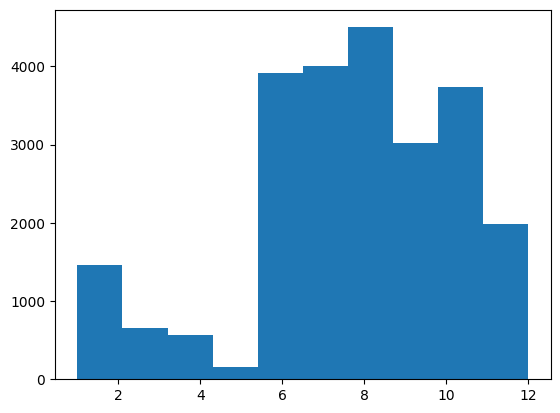

In [ ]:
plt.hist(cdatanx['time'])
plt.show()

In [ ]:
cdatanx['lat'].value_counts()
#cdatanx['lat'].unique()

-30.391134    1060
-30.625815    1060
-20.534550    1058
-20.769231    1058
-21.003911    1057
-21.238592    1056
-30.860495    1054
-31.095176    1046
-24.993481    1043
-24.758801    1031
-24.524120    1024
-24.289439    1021
 13.494133     997
 12.790091     989
 13.259452     987
 13.024772     982
 24.054759     949
 23.820078     948
 23.350717     946
 23.585398     945
 21.473272     935
 21.707953     934
 22.177314     911
 21.942634     910
Name: lat, dtype: int64

## featur engineering to lat

In [ ]:
bins = [-90, 0, 90]
labels = ['Southern Hemisphere', 'Northern Hemisphere']
cdatanx['lat_binned'] = pd.cut(cdatanx['lat'], bins=bins, labels=labels)
cdatanx

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time,lat_binned
0,21.707953,275.0000,78.909431,-58.805229,36.200672,-58.260475,-0.722955,0.022321,97497.79688,97498.90625,227.119232,273.045563,1.390000e-05,302.350861,300.026764,66.339836,12400.22754,66.241585,10,Northern Hemisphere
2,21.473272,275.0000,80.641357,-42.340290,58.060246,-56.400234,26.484743,0.022204,96611.60156,96611.60156,229.172897,273.580810,1.440000e-05,302.350861,299.798828,66.165573,12371.33203,66.165268,10,Northern Hemisphere
4,21.707953,275.3125,76.891205,-45.996342,42.691631,-48.993065,10.246445,0.022328,98168.55469,98175.43750,224.642563,272.152283,9.890000e-06,302.462708,300.160187,66.880089,12386.88574,66.275246,10,Northern Hemisphere
6,21.473272,275.3125,76.771362,-33.228142,57.195755,-46.387169,25.953285,0.022245,97758.07031,97758.10938,225.363648,271.941498,9.270000e-06,302.462708,300.021759,66.232269,12359.41309,66.228661,10,Northern Hemisphere
8,21.707953,275.6250,74.268501,-37.684723,42.142948,-41.747562,14.927589,0.022106,98841.56250,98852.13281,222.947571,271.887268,7.160000e-06,302.462708,300.101929,67.174088,12392.40234,66.251289,10,Northern Hemisphere
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44741,13.494133,253.7500,73.321968,21.677361,-22.360260,27.409748,-1.814677,0.019768,100134.93750,100134.93750,220.888092,270.320007,1.410000e-05,301.428863,298.425842,65.764488,12476.83887,65.764488,6,Northern Hemisphere
44742,13.259452,253.7500,57.735180,29.336315,3.866159,30.041025,6.957835,0.021593,99285.27344,99285.27344,218.439926,270.495758,1.200000e-07,301.878662,300.797058,66.483833,12338.07715,66.483833,12,Northern Hemisphere
44743,13.259452,253.7500,57.735180,29.336315,3.866159,30.041025,6.957835,0.021593,99285.27344,99285.27344,218.439926,270.495758,1.200000e-07,301.878662,300.797058,66.483833,12338.07715,66.483833,12,Northern Hemisphere
44751,13.494133,253.7500,58.471558,26.397322,5.664860,30.215387,1.547393,0.021974,98739.55469,98739.55469,217.845352,272.109589,1.120000e-07,301.878662,300.574646,66.438522,12340.96973,66.438522,12,Northern Hemisphere


In [ ]:
cdatanx = pd.get_dummies(cdatanx, columns=['lat_binned'])
cdatanx

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,...,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time,lat_binned_Southern Hemisphere,lat_binned_Northern Hemisphere
0,21.707953,275.0000,78.909431,-58.805229,36.200672,-58.260475,-0.722955,0.022321,97497.79688,97498.90625,...,273.045563,1.390000e-05,302.350861,300.026764,66.339836,12400.22754,66.241585,10,0,1
2,21.473272,275.0000,80.641357,-42.340290,58.060246,-56.400234,26.484743,0.022204,96611.60156,96611.60156,...,273.580810,1.440000e-05,302.350861,299.798828,66.165573,12371.33203,66.165268,10,0,1
4,21.707953,275.3125,76.891205,-45.996342,42.691631,-48.993065,10.246445,0.022328,98168.55469,98175.43750,...,272.152283,9.890000e-06,302.462708,300.160187,66.880089,12386.88574,66.275246,10,0,1
6,21.473272,275.3125,76.771362,-33.228142,57.195755,-46.387169,25.953285,0.022245,97758.07031,97758.10938,...,271.941498,9.270000e-06,302.462708,300.021759,66.232269,12359.41309,66.228661,10,0,1
8,21.707953,275.6250,74.268501,-37.684723,42.142948,-41.747562,14.927589,0.022106,98841.56250,98852.13281,...,271.887268,7.160000e-06,302.462708,300.101929,67.174088,12392.40234,66.251289,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44741,13.494133,253.7500,73.321968,21.677361,-22.360260,27.409748,-1.814677,0.019768,100134.93750,100134.93750,...,270.320007,1.410000e-05,301.428863,298.425842,65.764488,12476.83887,65.764488,6,0,1
44742,13.259452,253.7500,57.735180,29.336315,3.866159,30.041025,6.957835,0.021593,99285.27344,99285.27344,...,270.495758,1.200000e-07,301.878662,300.797058,66.483833,12338.07715,66.483833,12,0,1
44743,13.259452,253.7500,57.735180,29.336315,3.866159,30.041025,6.957835,0.021593,99285.27344,99285.27344,...,270.495758,1.200000e-07,301.878662,300.797058,66.483833,12338.07715,66.483833,12,0,1
44751,13.494133,253.7500,58.471558,26.397322,5.664860,30.215387,1.547393,0.021974,98739.55469,98739.55469,...,272.109589,1.120000e-07,301.878662,300.574646,66.438522,12340.96973,66.438522,12,0,1


In [ ]:
cdatanx = pd.get_dummies(cdatanx, columns=['time'])
cdatanx

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,...,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11,time_12
0,21.707953,275.0000,78.909431,-58.805229,36.200672,-58.260475,-0.722955,0.022321,97497.79688,97498.90625,...,0,0,0,0,0,0,0,1,0,0
2,21.473272,275.0000,80.641357,-42.340290,58.060246,-56.400234,26.484743,0.022204,96611.60156,96611.60156,...,0,0,0,0,0,0,0,1,0,0
4,21.707953,275.3125,76.891205,-45.996342,42.691631,-48.993065,10.246445,0.022328,98168.55469,98175.43750,...,0,0,0,0,0,0,0,1,0,0
6,21.473272,275.3125,76.771362,-33.228142,57.195755,-46.387169,25.953285,0.022245,97758.07031,97758.10938,...,0,0,0,0,0,0,0,1,0,0
8,21.707953,275.6250,74.268501,-37.684723,42.142948,-41.747562,14.927589,0.022106,98841.56250,98852.13281,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44741,13.494133,253.7500,73.321968,21.677361,-22.360260,27.409748,-1.814677,0.019768,100134.93750,100134.93750,...,0,0,0,1,0,0,0,0,0,0
44742,13.259452,253.7500,57.735180,29.336315,3.866159,30.041025,6.957835,0.021593,99285.27344,99285.27344,...,0,0,0,0,0,0,0,0,0,1
44743,13.259452,253.7500,57.735180,29.336315,3.866159,30.041025,6.957835,0.021593,99285.27344,99285.27344,...,0,0,0,0,0,0,0,0,0,1
44751,13.494133,253.7500,58.471558,26.397322,5.664860,30.215387,1.547393,0.021974,98739.55469,98739.55469,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
cdatanx.columns

Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'lat_binned_Southern Hemisphere', 'lat_binned_Northern Hemisphere',
       'time_1', 'time_2', 'time_3', 'time_4', 'time_5', 'time_6', 'time_7',
       'time_8', 'time_9', 'time_10', 'time_11', 'time_12'],
      dtype='object')

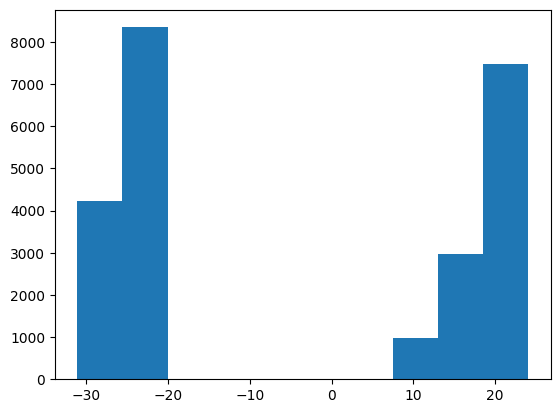

In [ ]:
plt.hist(cdatanx['lat'])
plt.show()

## PSL

In [ ]:
import seaborn as sns
from scipy import stats

In [ ]:
psl = cdatanx['PSL']

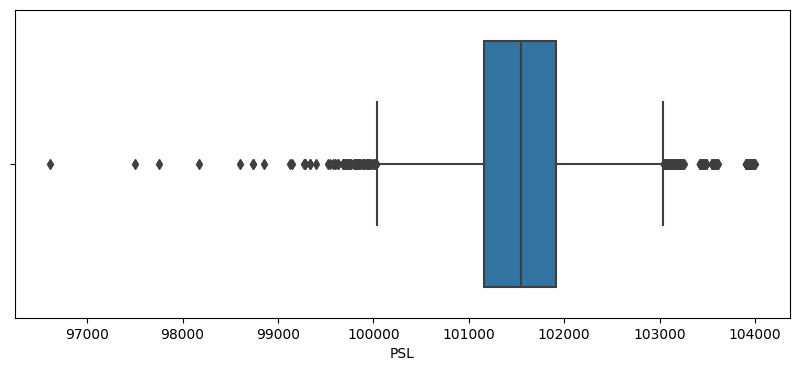

In [ ]:
plt.figure(figsize=(10, 4))

sns.boxplot(x=psl)

plt.show()

In [ ]:
psl = np.array(psl)

In [ ]:
# Calculate the IQR of the data
Q1 = np.percentile(psl, 10)
Q3 = np.percentile(psl, 90)
IQR = Q3 - Q1

# Define the outlier step
outlier_step = 1.5 * IQR

# A list of indices of outliers
outlier_list = [i for i in range(len(psl)) if (psl[i] < Q1 - outlier_step) or (psl[i] > Q3 + outlier_step)]

# Array without outliers
psl_clean = np.delete(psl, outlier_list)

In [ ]:
len(psl_clean)

23993

In [ ]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l2']}

In [ ]:
#logisticRegr = LogisticRegression(max_iter=2000)
logreg = LogisticRegression(multi_class = "multinomial", max_iter=10000)
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=5)
grid_search.fit(normalized_data, trainY)
#logisticRegr.fit(normalized_data, trainY)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

NameError: ignored

In [ ]:
test = pd.read_csv('test.csv')
test

,SNo,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time
0,1,-30.391134,354.3750,25.907482,6.662070,-17.510447,-7.432653,-3.936030,0.010624,101532.5391,101532.5391,213.092209,256.032043,3.350000e-09,290.697632,290.039947,129.814316,11948.68848,63.752274,20101009
1,2,-30.391134,354.3750,25.907482,6.662070,-17.510447,-7.432653,-3.936030,0.010624,101532.5391,101532.5391,213.092209,256.032043,3.350000e-09,290.697632,290.039947,129.814316,11948.68848,63.752274,20101009
2,3,-31.095176,354.3750,27.019733,4.951319,-17.341263,-7.286631,-3.150316,0.010890,101513.0234,101513.0234,213.161011,255.616837,1.890000e-11,290.372650,289.940613,128.204788,11931.06738,63.753948,20101009
3,4,-31.095176,354.3750,27.019733,4.951319,-17.341263,-7.286631,-3.150316,0.010890,101513.0234,101513.0234,213.161011,255.616837,1.890000e-11,290.372650,289.940613,128.204788,11931.06738,63.753948,20101009
4,5,-30.860495,354.3750,26.516499,5.362008,-17.227922,-7.257047,-2.907396,0.010821,101505.1484,101505.1484,213.188248,255.498810,1.130000e-09,290.697632,290.041351,127.552147,11936.12500,63.761059,20101009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,10316,24.054759,277.1875,57.411018,3.704696,17.998688,-8.723821,14.131296,0.020041,100295.9375,100295.9375,222.533188,267.842407,3.130000e-07,301.174225,300.485138,66.389023,12396.92969,66.389023,20101022
10316,10317,24.054759,276.8750,57.277252,5.944778,18.429197,-8.424341,15.523009,0.020222,100210.2891,100210.2891,221.928162,268.028778,5.630000e-07,301.385193,300.541840,66.398727,12395.43750,66.398727,20101022
10317,10318,24.054759,276.8750,57.277252,5.944778,18.429197,-8.424341,15.523009,0.020222,100210.2891,100210.2891,221.928162,268.028778,5.630000e-07,301.385193,300.541840,66.398727,12395.43750,66.398727,20101022
10318,10319,24.054759,276.5625,54.855862,8.170049,19.165062,-6.791406,16.326492,0.020324,100116.5234,100116.5234,220.904862,267.992645,5.290000e-07,301.408600,300.491333,66.385506,12391.72363,66.385506,20101022


In [ ]:
testx = test.drop(columns=["SNo"])
testx

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time
0,-30.391134,354.3750,25.907482,6.662070,-17.510447,-7.432653,-3.936030,0.010624,101532.5391,101532.5391,213.092209,256.032043,3.350000e-09,290.697632,290.039947,129.814316,11948.68848,63.752274,20101009
1,-30.391134,354.3750,25.907482,6.662070,-17.510447,-7.432653,-3.936030,0.010624,101532.5391,101532.5391,213.092209,256.032043,3.350000e-09,290.697632,290.039947,129.814316,11948.68848,63.752274,20101009
2,-31.095176,354.3750,27.019733,4.951319,-17.341263,-7.286631,-3.150316,0.010890,101513.0234,101513.0234,213.161011,255.616837,1.890000e-11,290.372650,289.940613,128.204788,11931.06738,63.753948,20101009
3,-31.095176,354.3750,27.019733,4.951319,-17.341263,-7.286631,-3.150316,0.010890,101513.0234,101513.0234,213.161011,255.616837,1.890000e-11,290.372650,289.940613,128.204788,11931.06738,63.753948,20101009
4,-30.860495,354.3750,26.516499,5.362008,-17.227922,-7.257047,-2.907396,0.010821,101505.1484,101505.1484,213.188248,255.498810,1.130000e-09,290.697632,290.041351,127.552147,11936.12500,63.761059,20101009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,24.054759,277.1875,57.411018,3.704696,17.998688,-8.723821,14.131296,0.020041,100295.9375,100295.9375,222.533188,267.842407,3.130000e-07,301.174225,300.485138,66.389023,12396.92969,66.389023,20101022
10316,24.054759,276.8750,57.277252,5.944778,18.429197,-8.424341,15.523009,0.020222,100210.2891,100210.2891,221.928162,268.028778,5.630000e-07,301.385193,300.541840,66.398727,12395.43750,66.398727,20101022
10317,24.054759,276.8750,57.277252,5.944778,18.429197,-8.424341,15.523009,0.020222,100210.2891,100210.2891,221.928162,268.028778,5.630000e-07,301.385193,300.541840,66.398727,12395.43750,66.398727,20101022
10318,24.054759,276.5625,54.855862,8.170049,19.165062,-6.791406,16.326492,0.020324,100116.5234,100116.5234,220.904862,267.992645,5.290000e-07,301.408600,300.491333,66.385506,12391.72363,66.385506,20101022


In [ ]:
testx['time'] = pd.to_datetime(testx['time'], format='%Y%m%d')
testx["time"] = testx["time"].dt.month
testx

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time
0,-30.391134,354.3750,25.907482,6.662070,-17.510447,-7.432653,-3.936030,0.010624,101532.5391,101532.5391,213.092209,256.032043,3.350000e-09,290.697632,290.039947,129.814316,11948.68848,63.752274,10
1,-30.391134,354.3750,25.907482,6.662070,-17.510447,-7.432653,-3.936030,0.010624,101532.5391,101532.5391,213.092209,256.032043,3.350000e-09,290.697632,290.039947,129.814316,11948.68848,63.752274,10
2,-31.095176,354.3750,27.019733,4.951319,-17.341263,-7.286631,-3.150316,0.010890,101513.0234,101513.0234,213.161011,255.616837,1.890000e-11,290.372650,289.940613,128.204788,11931.06738,63.753948,10
3,-31.095176,354.3750,27.019733,4.951319,-17.341263,-7.286631,-3.150316,0.010890,101513.0234,101513.0234,213.161011,255.616837,1.890000e-11,290.372650,289.940613,128.204788,11931.06738,63.753948,10
4,-30.860495,354.3750,26.516499,5.362008,-17.227922,-7.257047,-2.907396,0.010821,101505.1484,101505.1484,213.188248,255.498810,1.130000e-09,290.697632,290.041351,127.552147,11936.12500,63.761059,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,24.054759,277.1875,57.411018,3.704696,17.998688,-8.723821,14.131296,0.020041,100295.9375,100295.9375,222.533188,267.842407,3.130000e-07,301.174225,300.485138,66.389023,12396.92969,66.389023,10
10316,24.054759,276.8750,57.277252,5.944778,18.429197,-8.424341,15.523009,0.020222,100210.2891,100210.2891,221.928162,268.028778,5.630000e-07,301.385193,300.541840,66.398727,12395.43750,66.398727,10
10317,24.054759,276.8750,57.277252,5.944778,18.429197,-8.424341,15.523009,0.020222,100210.2891,100210.2891,221.928162,268.028778,5.630000e-07,301.385193,300.541840,66.398727,12395.43750,66.398727,10
10318,24.054759,276.5625,54.855862,8.170049,19.165062,-6.791406,16.326492,0.020324,100116.5234,100116.5234,220.904862,267.992645,5.290000e-07,301.408600,300.491333,66.385506,12391.72363,66.385506,10


In [ ]:
bins = [-90, 0, 90]
labels = ['Southern Hemisphere', 'Northern Hemisphere']
testx['lat_binned'] = pd.cut(testx['lat'], bins=bins, labels=labels)
testx

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,...,time_9,time_10,time_1,time_2,time_3,time_4,time_5,time_11,time_12,lat_binned
0,-30.391134,354.3750,25.907482,6.662070,-17.510447,-7.432653,-3.936030,0.010624,101532.5391,101532.5391,...,0,1,0,0,0,0,0,0,0,Southern Hemisphere
1,-30.391134,354.3750,25.907482,6.662070,-17.510447,-7.432653,-3.936030,0.010624,101532.5391,101532.5391,...,0,1,0,0,0,0,0,0,0,Southern Hemisphere
2,-31.095176,354.3750,27.019733,4.951319,-17.341263,-7.286631,-3.150316,0.010890,101513.0234,101513.0234,...,0,1,0,0,0,0,0,0,0,Southern Hemisphere
3,-31.095176,354.3750,27.019733,4.951319,-17.341263,-7.286631,-3.150316,0.010890,101513.0234,101513.0234,...,0,1,0,0,0,0,0,0,0,Southern Hemisphere
4,-30.860495,354.3750,26.516499,5.362008,-17.227922,-7.257047,-2.907396,0.010821,101505.1484,101505.1484,...,0,1,0,0,0,0,0,0,0,Southern Hemisphere
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,24.054759,277.1875,57.411018,3.704696,17.998688,-8.723821,14.131296,0.020041,100295.9375,100295.9375,...,0,1,0,0,0,0,0,0,0,Northern Hemisphere
10316,24.054759,276.8750,57.277252,5.944778,18.429197,-8.424341,15.523009,0.020222,100210.2891,100210.2891,...,0,1,0,0,0,0,0,0,0,Northern Hemisphere
10317,24.054759,276.8750,57.277252,5.944778,18.429197,-8.424341,15.523009,0.020222,100210.2891,100210.2891,...,0,1,0,0,0,0,0,0,0,Northern Hemisphere
10318,24.054759,276.5625,54.855862,8.170049,19.165062,-6.791406,16.326492,0.020324,100116.5234,100116.5234,...,0,1,0,0,0,0,0,0,0,Northern Hemisphere


In [ ]:
testx = pd.get_dummies(testx, columns=['lat_binned'])

In [ ]:
testx = pd.get_dummies(testx, columns=['time'])

In [ ]:
testx['time_1']=0
testx['time_2']=0
testx['time_3']=0
testx['time_4']=0
testx['time_5']=0
testx['time_11']=0
testx['time_12']=0

In [ ]:
testx

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,...,time_10,time_1,time_2,time_3,time_4,time_5,time_11,time_12,lat_binned_Southern Hemisphere,lat_binned_Northern Hemisphere
0,-30.391134,354.3750,25.907482,6.662070,-17.510447,-7.432653,-3.936030,0.010624,101532.5391,101532.5391,...,1,0,0,0,0,0,0,0,1,0
1,-30.391134,354.3750,25.907482,6.662070,-17.510447,-7.432653,-3.936030,0.010624,101532.5391,101532.5391,...,1,0,0,0,0,0,0,0,1,0
2,-31.095176,354.3750,27.019733,4.951319,-17.341263,-7.286631,-3.150316,0.010890,101513.0234,101513.0234,...,1,0,0,0,0,0,0,0,1,0
3,-31.095176,354.3750,27.019733,4.951319,-17.341263,-7.286631,-3.150316,0.010890,101513.0234,101513.0234,...,1,0,0,0,0,0,0,0,1,0
4,-30.860495,354.3750,26.516499,5.362008,-17.227922,-7.257047,-2.907396,0.010821,101505.1484,101505.1484,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,24.054759,277.1875,57.411018,3.704696,17.998688,-8.723821,14.131296,0.020041,100295.9375,100295.9375,...,1,0,0,0,0,0,0,0,0,1
10316,24.054759,276.8750,57.277252,5.944778,18.429197,-8.424341,15.523009,0.020222,100210.2891,100210.2891,...,1,0,0,0,0,0,0,0,0,1
10317,24.054759,276.8750,57.277252,5.944778,18.429197,-8.424341,15.523009,0.020222,100210.2891,100210.2891,...,1,0,0,0,0,0,0,0,0,1
10318,24.054759,276.5625,54.855862,8.170049,19.165062,-6.791406,16.326492,0.020324,100116.5234,100116.5234,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
testn = test.drop(columns=["SNo","lat","lon","time","PRECT"])

In [ ]:
cdatanx

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,...,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11,time_12
0,21.707953,275.0000,78.909431,-58.805229,36.200672,-58.260475,-0.722955,0.022321,97497.79688,97498.90625,...,0,0,0,0,0,0,0,1,0,0
2,21.473272,275.0000,80.641357,-42.340290,58.060246,-56.400234,26.484743,0.022204,96611.60156,96611.60156,...,0,0,0,0,0,0,0,1,0,0
4,21.707953,275.3125,76.891205,-45.996342,42.691631,-48.993065,10.246445,0.022328,98168.55469,98175.43750,...,0,0,0,0,0,0,0,1,0,0
6,21.473272,275.3125,76.771362,-33.228142,57.195755,-46.387169,25.953285,0.022245,97758.07031,97758.10938,...,0,0,0,0,0,0,0,1,0,0
8,21.707953,275.6250,74.268501,-37.684723,42.142948,-41.747562,14.927589,0.022106,98841.56250,98852.13281,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44741,13.494133,253.7500,73.321968,21.677361,-22.360260,27.409748,-1.814677,0.019768,100134.93750,100134.93750,...,0,0,0,1,0,0,0,0,0,0
44742,13.259452,253.7500,57.735180,29.336315,3.866159,30.041025,6.957835,0.021593,99285.27344,99285.27344,...,0,0,0,0,0,0,0,0,0,1
44743,13.259452,253.7500,57.735180,29.336315,3.866159,30.041025,6.957835,0.021593,99285.27344,99285.27344,...,0,0,0,0,0,0,0,0,0,1
44751,13.494133,253.7500,58.471558,26.397322,5.664860,30.215387,1.547393,0.021974,98739.55469,98739.55469,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(cdatanx[['lat','lon','TMQ','U850','V850','UBOT','VBOT','QREFHT','PS','PSL','T200','T500','TS','TREFHT','Z1000','Z200','ZBOT']])

cdatanx_scaled = cdatanx.copy()

cdatanx_scaled[['lat','lon','TMQ','U850','V850','UBOT','VBOT','QREFHT','PS','PSL','T200','T500','TS','TREFHT','Z1000','Z200','ZBOT']] = scaler.transform(cdatanx[['lat','lon','TMQ','U850','V850','UBOT','VBOT','QREFHT','PS','PSL','T200','T500','TS','TREFHT','Z1000','Z200','ZBOT']])
#scaler = preprocessing.StandardScaler().fit(cdatanx[['lat','lon','TMQ','U850','V850','UBOT','VBOT','QREFHT','PS','PSL','T200','T500','TS','TREFHT','Z1000','Z200','ZBOT']])
#scalertrainx = scaler.transform(cdatanx[['lat','lon','TMQ','U850','V850','UBOT','VBOT','QREFHT','PS','PSL','T200','T500','TS','TREFHT','Z1000','Z200','ZBOT']])

#scalertestx = scaler.transform(testx[['lat','lon','TMQ','U850','V850','UBOT','VBOT','QREFHT','PS','PSL','T200','T500','TS','TREFHT','Z1000','Z200','ZBOT']])


[]

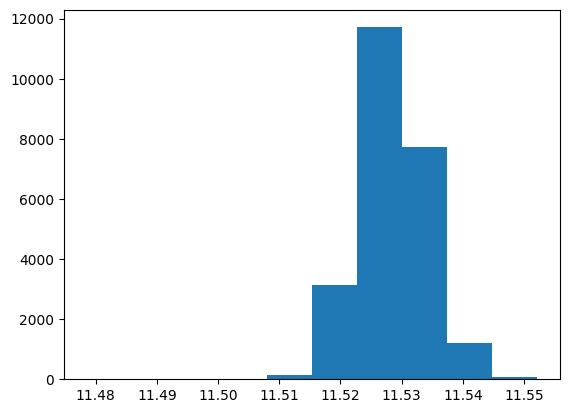

In [ ]:
plt.hist(cdatanx_scaled['PSL'])
plt.plot()

In [ ]:
cdatanx_scaledtry = cdatanx_scaled.drop(columns=['PRECT'])

In [ ]:
trainxtry = np.array(cdatanx_scaledtry)

In [ ]:
# # Calculate the IQR of the data
# Q1 = cdatanx_scaled['PSL'].quantile(0.25)
# Q3 = cdatanx_scaled['PSL'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the outlier step
# outlier_step = 1.5 * IQR

# # Drop the outliers from the DataFrame
# cdatanx_scaled = cdatanx_scaled[~((cdatanx_scaled['PSL'] < (Q1 - outlier_step)) | (cdatanx_scaled['PSL'] > (Q3 + outlier_step)))]

In [ ]:
np.unique(trainY)

array([0, 1, 2])

In [ ]:
len(trainY)

23776

[]

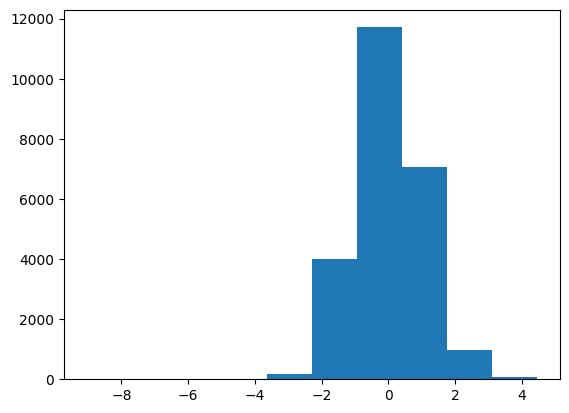

In [ ]:
plt.hist(cdatanx_scaled['PSL'])
plt.plot()

In [ ]:
scalertrainx = np.array(cdatanx_scaled)

In [ ]:
scaler.fit(testx[['lat','lon','TMQ','U850','V850','UBOT','VBOT','QREFHT','PS','PSL','T200','T500','TS','TREFHT','Z1000','Z200','ZBOT']])

testx_scaled = testx.copy()

testx_scaled[['lat','lon','TMQ','U850','V850','UBOT','VBOT','QREFHT','PS','PSL','T200','T500','TS','TREFHT','Z1000','Z200','ZBOT']] = scaler.transform(testx[['lat','lon','TMQ','U850','V850','UBOT','VBOT','QREFHT','PS','PSL','T200','T500','TS','TREFHT','Z1000','Z200','ZBOT']])

In [ ]:
testx_scaled

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,...,time_10,time_1,time_2,time_3,time_4,time_5,time_11,time_12,lat_binned_Southern Hemisphere,lat_binned_Northern Hemisphere
0,-1.198682,2.073377,-0.770097,1.002204,-4.042443,-0.804148,-0.808444,-0.872154,-0.060947,-0.064930,...,1,0,0,0,0,0,0,0,1,0
1,-1.198682,2.073377,-0.770097,1.002204,-4.042443,-0.804148,-0.808444,-0.872154,-0.060947,-0.064930,...,1,0,0,0,0,0,0,0,1,0
2,-1.229417,2.073377,-0.690904,0.766348,-4.004474,-0.781850,-0.644125,-0.811214,-0.093567,-0.097636,...,1,0,0,0,0,0,0,0,1,0
3,-1.229417,2.073377,-0.690904,0.766348,-4.004474,-0.781850,-0.644125,-0.811214,-0.093567,-0.097636,...,1,0,0,0,0,0,0,0,1,0
4,-1.219172,2.073377,-0.726735,0.822969,-3.979037,-0.777332,-0.593323,-0.826986,-0.106729,-0.110833,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,1.178192,0.192872,1.472966,0.594480,3.926673,-1.001318,2.970023,1.284460,-2.127887,-2.137293,...,1,0,0,0,0,0,0,0,0,1
10316,1.178192,0.185259,1.463442,0.903313,4.023290,-0.955586,3.261075,1.325897,-2.271045,-2.280827,...,1,0,0,0,0,0,0,0,0,1
10317,1.178192,0.185259,1.463442,0.903313,4.023290,-0.955586,3.261075,1.325897,-2.271045,-2.280827,...,1,0,0,0,0,0,0,0,0,1
10318,1.178192,0.177646,1.291038,1.210105,4.188436,-0.706225,3.429110,1.349187,-2.427772,-2.437964,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
scalertestx = np.array(testx_scaled)

In [ ]:
trainy = np.array(trainY)

In [ ]:
scalertestx

array([[-1.19868199,  2.07337702, -0.77009703, ...,  0.        ,
         0.        ,  0.        ],
       [-1.19868199,  2.07337702, -0.77009703, ...,  0.        ,
         0.        ,  0.        ],
       [-1.22941743,  2.07337702, -0.69090434, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.1781917 ,  0.1852589 ,  1.46344177, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.1781917 ,  0.17764552,  1.2910379 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.1781917 ,  0.17764552,  1.2910379 , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# month = cdatanx['time'].values
# cdatanx['month_sin'] = np.sin(2 * np.pi * month / 12)
# cdatanx['month_cos'] = np.cos(2 * np.pi * month / 12)
# cdatanx

In [ ]:
y_encoded = pd.get_dummies(cdatan, columns=['Label'])

y_encoded = y_encoded.iloc[:,-3:]
y_encoded

,Label_0,Label_1,Label_2
0,0,1,0
2,0,1,0
4,0,1,0
6,0,1,0
8,0,1,0
...,...,...,...
44741,0,1,0
44742,1,0,0
44743,0,1,0
44751,0,1,0


In [ ]:
trainyarray = np.array(y_encoded)

trainyarray

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

## Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_temp, data_test, labels_temp, labels_test = train_test_split(trainxtry, trainy, test_size=0.2, random_state=42)
data_train, data_val, labels_train, labels_val = train_test_split(data_temp, labels_temp, test_size=0.25, random_state=42)

In [ ]:
data_val.shape

(4800, 32)

In [ ]:
# train_dataset, val_dataset, test_dataset = ...
num_classes = 3
# Define the model architecture
modeltf = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),

    layers.Dense(128, activation='relu'),

    layers.Dense(128, activation='relu'),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout layer
    layers.Dense(num_classes, activation='softmax')  # num_classes is the number of classes in your dataset
])

# Compile the model
modeltf.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
# Train the model
history = modeltf.fit(data_train, labels_train, validation_data=(data_val, labels_val), epochs=20)

# Evaluate the model
loss, accuracy = modeltf.evaluate(data_test, labels_test)
print(f'Test accuracy : {accuracy}')

Epoch 1/20
450/450 [==============================] - 71s 7ms/step - loss: 0.5008 - sparse_categorical_accuracy: 0.7806 - val_loss: 0.4460 - val_sparse_categorical_accuracy: 0.7817
Epoch 2/20
450/450 [==============================] - 2s 5ms/step - loss: 0.4147 - sparse_categorical_accuracy: 0.8104 - val_loss: 0.4334 - val_sparse_categorical_accuracy: 0.7948
Epoch 3/20
450/450 [==============================] - 2s 4ms/step - loss: 0.3664 - sparse_categorical_accuracy: 0.8282 - val_loss: 0.3468 - val_sparse_categorical_accuracy: 0.8275
Epoch 4/20
450/450 [==============================] - 2s 4ms/step - loss: 0.3316 - sparse_categorical_accuracy: 0.8366 - val_loss: 0.3182 - val_sparse_categorical_accuracy: 0.8294
Epoch 5/20
450/450 [==============================] - 2s 5ms/step - loss: 0.3009 - sparse_categorical_accuracy: 0.8458 - val_loss: 0.3177 - val_sparse_categorical_accuracy: 0.8331
Epoch 6/20
450/450 [==============================] - 2s 5ms/step - loss: 0.2839 - sparse_categoric

In [ ]:
predicttf = modeltf.predict(scalertestx)

323/323 [==============================] - 1s 2ms/step


In [ ]:
predicted_classes = np.argmax(predicttf, axis=1)

In [ ]:
np.unique(predicted_classes)

array([0, 1, 2])

In [ ]:
dftf = pd.DataFrame(predicted_classes, columns=['Label'])
dftf['SNo']= test['SNo']

dftf.to_csv('predictionstf.csv', index=False)


In [ ]:
np.unique(trainyarray)

array([0, 1], dtype=uint8)

## Logistic Regreesion

In [ ]:
from sklearn.utils import compute_class_weight

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
# def softmax(x):
#     e_x = np.exp(x - np.max(x))
#     return e_x / e_x.sum(axis=1, keepdims=True)

In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    if x.ndim == 1:
        return e_x / np.sum(e_x, axis=0)
    else: # x.ndim == 2
        return e_x / np.sum(e_x, axis=1, keepdims=True)


In [ ]:
def cross_entropy_loss(y, y_hat):
    loss = -np.sum(y*np.log(y_hat))/y.shape[0]
    return loss
    #-(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [ ]:
#Batch Gradient Descent
class LRbgd:
    def __init__(self, learning_rate=None, n_epochs=None, class_weights=None, decay_factor=0.5, decay_epochs=10, l2_reg=0):
        self.lr = learning_rate
        self.n_epochs = n_epochs
        self.class_weights = class_weights
        self.decay_factor = decay_factor
        self.decay_epochs = decay_epochs
        self.l2_reg = l2_reg

    def calculate_learning_rate(self, epoch):
        return self.lr * (self.decay_factor ** (epoch // self.decay_epochs))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        num_classes = 3

        if len(y.shape) == 1:
            y_encoded = np.zeros((num_samples, num_classes))
            y_encoded[np.arange(num_samples), y] = 1
            y = y_encoded

        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros(num_classes)

        for epoch in range(self.n_epochs):
            lr = self.calculate_learning_rate(epoch)

            y_pred = softmax(np.dot(X, self.weights) + self.bias)
            loss = cross_entropy_loss(y, y_pred) + 0.5 * self.l2_reg * np.sum(self.weights ** 2)

            dW = np.dot(X.T, (y_pred - y)) / num_samples + self.l2_reg * self.weights
            db = np.sum(y_pred - y, axis=0) / num_samples

            self.weights -= lr * dW
            self.bias -= lr * db

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        y_pred = softmax(np.dot(X, self.weights) + self.bias)
        labels = np.argmax(y_pred, axis=1)
        return labels

In [ ]:
#mini-batch
class LRmbgd:
    def __init__(self, learning_rate=None, n_epochs=None, batch_size=None):
        self.lr = learning_rate
        self.n_epochs = n_epochs
        self.batch_size = batch_size



    def fit(self, X, y, X_val=None, y_val=None):
        num_samples, num_features = X.shape
        num_classes = 3  # Assuming 3 classes

        if len(y.shape) == 1:
            y_encoded = np.zeros((num_samples, num_classes))
            y_encoded[np.arange(num_samples), y] = 1
            y = y_encoded

        self.weights = np.random.randn(num_features, num_classes)
        self.bias = np.zeros(num_classes)

        best_val_loss = float('inf')

        for epoch in range(self.n_epochs):
            # Mini-batch gradient descent
            for j in range(0, num_samples, self.batch_size):
                x_batch = X[j:j+self.batch_size]
                y_batch = y[j:j+self.batch_size]

                y_pred = softmax(np.dot(x_batch, self.weights) + self.bias)
                loss = cross_entropy_loss(y_batch, y_pred)

                dW = np.dot(x_batch.T, y_pred - y_batch) / self.batch_size
                db = np.mean(y_pred - y_batch, axis=0)

                self.weights -= self.lr * dW
                self.bias -= self.lr * db

            if X_val is not None and y_val is not None:
                val_loss = cross_entropy_loss(y_val, softmax(np.dot(X_val, self.weights) + self.bias))
                print(f"Epoch {epoch}, Training Loss: {loss}, Validation Loss: {val_loss}")

                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                else:
                    print("Validation loss stopped improving. Stopping training.")
                    break
            else:
                print(f"Epoch {epoch}, Training Loss: {loss}")

        print("Training finished.")

        if X_val is not None and y_val is not None:
            print(f"Best validation loss: {best_val_loss}")


    # The predict method remains the same
    def predict(self, X):
        y_pred = softmax(np.dot(X, self.weights) + self.bias)
        labels = np.argmax(y_pred, axis=1)
        return labels

In [ ]:
#stochastic Gradient Descent
class LRsgd:
    def __init__(self, learning_rate=None, n_epochs=None):
        self.lr = learning_rate
        self.n_epochs = n_epochs

        # self.l2_reg = l2_reg
        # self.class_weights = class_weights if class_weights is not None else np.ones(3)
        # self.decay_factor = decay_factor
        # self.decay_epochs = decay_epochs
        #class_weights=None, decay_factor=0.5,decay_epochs=10


    # def calculate_learning_rate(self, epoch):
    #     return self.initial_lr * (self.decay_factor ** (epoch // self.decay_epochs))

    def fit(self, X, y):
        # X = X.values  # Convert X to a NumPy array
        # y = y.values  # Convert y to a NumPy array
        num_samples, num_features = X.shape
        num_classes = 3  # Assuming 3 classes

        if len(y.shape) == 1:
            y_encoded = np.zeros((num_samples, num_classes))
            y_encoded[np.arange(num_samples), y] = 1
            y = y_encoded

        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros(num_classes)

        for epoch in range(self.n_epochs):
            # Shuffle the data
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            #lr = self.calculate_learning_rate(epoch)  # Calculate learning rate for current epoch

            for j in range(num_samples):
                # Select a single sample
                x_sample = X_shuffled[j]
                y_sample = y_shuffled[j]

                # Compute y_hat for the single sample
                y_pred = softmax(np.dot(x_sample, self.weights) + self.bias)

                # Calculate loss for the single sample
                loss = cross_entropy_loss(y_sample, y_pred)
                #loss = cross_entropy_loss(y_sample, y_pred) + 0.5 * self.l2_reg * np.sum(self.weights ** 2)

                # Convert y_sample back to label encoding
                y_sample_label_encoded = np.argmax(y_sample)
                #sample_weight = self.class_weights[y_sample_label_encoded]

                # Compute gradients for the single sample
                dW = np.outer(x_sample, y_pred - y_sample)
                db = y_pred - y_sample
                # dW = np.outer(x_sample, (y_pred - y_sample)) * sample_weight / num_samples + self.l2_reg * self.weights
                # db = (y_pred - y_sample) * sample_weight / num_samples


                # Update weights and bias
                self.weights -= self.lr * dW
                self.bias -= self.lr * db

            if epoch % 10 == 0:
                total_loss = cross_entropy_loss(y, softmax(np.dot(X, self.weights) + self.bias))
                #total_loss = cross_entropy_loss(y, softmax(np.dot(X, self.weights) + self.bias)) + 0.5 * self.l2_reg * np.sum(self.weights ** 2)
                print(f"Epoch {epoch}, Loss: {total_loss}")

    # The predict method remains the same
    def predict(self, X):
        y_pred = softmax(np.dot(X, self.weights) + self.bias)
        labels = np.argmax(y_pred, axis=1)
        return labels

In [ ]:
thanks! this problem is solved. Now could you help me check my all code and told me how I can optimize the result of this logistic regression classifier with 3 classes labels? code: def softmax(x):
    e_x = np.exp(x - np.max(x))
    if x.ndim == 1:
        return e_x / np.sum(e_x, axis=0)
    else: # x.ndim == 2
        return e_x / np.sum(e_x, axis=1, keepdims=True)
def cross_entropy_loss(y, y_hat):
    loss = -np.sum(y*np.log(y_hat))/y.shape[0]
    return loss
    #-(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
class LR:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.lr = learning_rate
        self.n_epochs = n_epochs

    def fit(self, X, y):
        # X = X.values  # Convert X to a NumPy array
        # y = y.values  # Convert y to a NumPy array
        num_samples, num_features = X.shape
        num_classes = 3  # Assuming 3 classes

        if len(y.shape) == 1:
            y_encoded = np.zeros((num_samples, num_classes))
            y_encoded[np.arange(num_samples), y] = 1
            y = y_encoded

        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros(num_classes)

        for epoch in range(self.n_epochs):
            # Shuffle the data
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for j in range(num_samples):
                # Select a single sample
                x_sample = X_shuffled[j]
                y_sample = y_shuffled[j]

                # Compute y_hat for the single sample
                y_pred = softmax(np.dot(x_sample, self.weights) + self.bias)

                # Calculate loss for the single sample
                loss = cross_entropy_loss(y_sample, y_pred)

                # Compute gradients for the single sample
                dW = np.outer(x_sample, y_pred - y_sample)
                db = y_pred - y_sample

                # Update weights and bias
                self.weights -= self.lr * dW
                self.bias -= self.lr * db

            if epoch % 10 == 0:
                total_loss = cross_entropy_loss(y, softmax(np.dot(X, self.weights) + self.bias))
                print(f"Epoch {epoch}, Loss: {total_loss}")

    # The predict method remains the same
    def predict(self, X):
        y_pred = softmax(np.dot(X, self.weights) + self.bias)
        labels = np.argmax(y_pred, axis=1)
        return labels
l = LR(learning_rate=0.01, n_epochs=100)
l.fit(scalertrainx, trainyarray)
Epoch 0, Loss: 0.5163828189008407
Epoch 10, Loss: 0.5035279523178048
Epoch 20, Loss: 0.4955228830273504
Epoch 30, Loss: 0.4921972306646515
Epoch 40, Loss: 0.5052207017279621
Epoch 50, Loss: 0.5079080998388976
Epoch 60, Loss: 0.5021280997272339
Epoch 70, Loss: 0.507210239744022
Epoch 80, Loss: 0.5022254151695706
Epoch 90, Loss: 0.5089482971450402

In [ ]:
lmb = LRmbgd(learning_rate=0.01, n_epochs=200, batch_size=64)

In [ ]:
#lmb.fit(scalertrainx, trainY)

In [ ]:
mbpd = lmb.predict(scalertestx)
np.unique(lmb.predict(scalertestx))

array([0, 1, 2])

In [ ]:
dfmb = pd.DataFrame(mbpd, columns=['Label'])
dfmb['SNo']= test['SNo']

dfmb.to_csv('predictionsmb.csv', index=False)

In [ ]:
lb = LRbgd(learning_rate=0.1, n_epochs=200)

In [ ]:
lb.fit(scalertrainx, trainY)

Epoch 0, Loss: 1.0986122886681098
Epoch 10, Loss: 0.7561797521721798
Epoch 20, Loss: 0.6909145532344632
Epoch 30, Loss: 0.668366119995611
Epoch 40, Loss: 0.6588291161962603
Epoch 50, Loss: 0.6544253589221158
Epoch 60, Loss: 0.6523072868501983
Epoch 70, Loss: 0.6512683509810315
Epoch 80, Loss: 0.6507538057801802
Epoch 90, Loss: 0.6504977513235016
Epoch 100, Loss: 0.6503700270789138
Epoch 110, Loss: 0.6503062405094807
Epoch 120, Loss: 0.6502743660889038
Epoch 130, Loss: 0.6502584335916443
Epoch 140, Loss: 0.6502504685208964
Epoch 150, Loss: 0.6502464862799459
Epoch 160, Loss: 0.6502444952330707
Epoch 170, Loss: 0.6502434997280324
Epoch 180, Loss: 0.6502430019801129
Epoch 190, Loss: 0.6502427531073032


In [ ]:
np.unique(trainY)

array([0, 1, 2])

In [ ]:
class_labels = np.unique(trainY)
class_weights = compute_class_weight('balanced', classes=class_labels, y=trainY)

In [ ]:
scalertrainx.shape

(24001, 31)

In [ ]:
trainyarray.shape

(24001, 3)

In [ ]:
l = LRsgd(learning_rate=0.01, n_epochs=100)

In [ ]:
l.fit(trainxtry, trainY)

Epoch 0, Loss: 0.49931033205575126
Epoch 10, Loss: 0.4878927440946164


KeyboardInterrupt: ignored

In [ ]:
scalertestx.shape

(10320, 31)

In [ ]:
new = l.predict(scalertestx)
np.unique(l.predict(scalertestx))

array([0, 1, 2])

In [ ]:
dfy = pd.DataFrame(new, columns=['Label'])
dfy['SNo']= test['SNo']

dfy.to_csv('predictions.csv', index=False)

## neural_network.MLPClassifier

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(scalertrainx, trainY, test_size=0.3, random_state=42)

In [ ]:
mlpmodel = MLPClassifier(max_iter=200,activation = "tanh", alpha = 0.0001,hidden_layer_sizes=(50,50,50),solver = "adam",learning_rate="adaptive")

In [ ]:
parameter_space = {
  'hidden_layer_sizes': [(100,100,100), (200,200,200), (500,)],
  'activation': ['tanh', 'relu'],
  'solver': ['sgd', 'adam'],
  'alpha': [0.0001, 0.05],
  'learning_rate': ['constant','adaptive'],
}

# Run the grid search
clfine = GridSearchCV(mlpmodel, parameter_space, n_jobs=-1, cv=3)
clfine.fit(X_train, y_train)

# Print the best parameters
print('Best parameters found:\n', clfine.best_params_)

KeyboardInterrupt: ignored

In [ ]:
mlptrainmodel = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=200, alpha=1e-4,
                    solver='adam', verbose=10, activation = "relu",
                    learning_rate_init=0.01)

In [ ]:
mlptrainmodel.fit(X_train, y_train)

ytrain_predictmlp = mlptrainmodel.predict(X_train)
yval_predictmlp = mlptrainmodel.predict(X_val)

Iteration 1, loss = 0.74450211
Iteration 2, loss = 0.50627068
Iteration 3, loss = 0.45959620
Iteration 4, loss = 0.43935903
Iteration 5, loss = 0.42480922
Iteration 6, loss = 0.41283478
Iteration 7, loss = 0.40369995
Iteration 8, loss = 0.39689525
Iteration 9, loss = 0.38669071
Iteration 10, loss = 0.37887371
Iteration 11, loss = 0.37105110
Iteration 12, loss = 0.36336536
Iteration 13, loss = 0.35518886
Iteration 14, loss = 0.34908454
Iteration 15, loss = 0.34162904
Iteration 16, loss = 0.33605888
Iteration 17, loss = 0.33198944
Iteration 18, loss = 0.32766594
Iteration 19, loss = 0.32138459
Iteration 20, loss = 0.31710447
Iteration 21, loss = 0.31227444
Iteration 22, loss = 0.30725712
Iteration 23, loss = 0.30316512
Iteration 24, loss = 0.29902147
Iteration 25, loss = 0.29770476
Iteration 26, loss = 0.29476688
Iteration 27, loss = 0.29286114
Iteration 28, loss = 0.28969353
Iteration 29, loss = 0.28617415
Iteration 30, loss = 0.28291302
Iteration 31, loss = 0.28102592
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
accuracy = metrics.accuracy_score(y_val, yval_predictmlp)
print(f'Accuracy: {accuracy}')

# Precision, Recall, F1-score
precision = metrics.precision_score(y_val, yval_predictmlp, average='macro')
recall = metrics.recall_score(y_val, yval_predictmlp, average='macro')
f1_score = metrics.f1_score(y_val, yval_predictmlp, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

Accuracy: 0.8537703096792112
Precision: 0.7945290280288853
Recall: 0.7107600359272546
F1 Score: 0.7453017220555834


In [ ]:
mlpm = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=200, alpha=1e-4,
                    solver='adam', verbose=10, activation = "relu",
                    learning_rate_init=0.01)

In [ ]:
mlpm.fit(scalertrainx,trainY)

Iteration 1, loss = 0.47912001
Iteration 2, loss = 0.42356859
Iteration 3, loss = 0.38189944
Iteration 4, loss = 0.35449956
Iteration 5, loss = 0.33387862
Iteration 6, loss = 0.32659425
Iteration 7, loss = 0.33787354
Iteration 8, loss = 0.34496681
Iteration 9, loss = 0.38284178
Iteration 10, loss = 0.32433118
Iteration 11, loss = 0.31063378
Iteration 12, loss = 0.29982646
Iteration 13, loss = 0.28503826
Iteration 14, loss = 0.27596128
Iteration 15, loss = 0.27123104
Iteration 16, loss = 0.33038570
Iteration 17, loss = 0.28254702
Iteration 18, loss = 0.27901520
Iteration 19, loss = 0.32052430
Iteration 20, loss = 0.30233126
Iteration 21, loss = 0.27507054
Iteration 22, loss = 0.25888318
Iteration 23, loss = 0.26724226
Iteration 24, loss = 0.25229781
Iteration 25, loss = 0.26255551
Iteration 26, loss = 0.24437710
Iteration 27, loss = 0.24572188
Iteration 28, loss = 0.24025898
Iteration 29, loss = 0.24403248
Iteration 30, loss = 0.24211069
Iteration 31, loss = 0.23730076
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01,
              verbose=10)

In [ ]:
mlppredict = mlpm.predict(scalertestx)
np.unique(mlppredict)

array([0, 1, 2])

In [ ]:
dfmlp = pd.DataFrame(mlppredict, columns=['Label'])
dfmlp['SNo']= test['SNo']

dfmlp.to_csv('predictionmlp.csv', index=False)

## xgboost

# to do: split train and validation set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from sklearn import metrics

X_train, X_val, y_train, y_val = train_test_split(trainxtry, trainY, test_size=0.3, random_state=42)


model = XGBClassifier(objective='multi:softprob',num_class=3,n_estimators=30,learning_rate=0.01,max_depth=12,min_child_weight=2,subsample=0.8,colsample_bytree=0.2,gamma=0.1)
#objective='multi:softprob',n_estimators=5,learning_rate=0.1,max_depth=8,min_child_weight=2,subsample=0.8,colsample_bytree=0.2

train_errors, val_errors = [], []

# step=50

# for m in range(step, len(X_train),step):
#     model.fit(X_train[:m], y_train[:m])

#     y_train_predict = model.predict(X_train[:m])
#     y_val_predict = model.predict(X_val)

#     train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
#     val_errors.append(mean_squared_error(y_val, y_val_predict))

# plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
# plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
# plt.legend(loc="upper right", fontsize=14)
# plt.xlabel("Training set size", fontsize=14)
# plt.ylabel("RMSE", fontsize=14)
# plt.show()


In [ ]:
model.fit(X_train, y_train)


ytrain_predict = model.predict(X_train)
yval_predict = model.predict(X_val)

In [ ]:
accuracy = metrics.accuracy_score(y_val, yval_predict)
print(f'Accuracy: {accuracy}')

# Precision, Recall, F1-score
precision = metrics.precision_score(y_val, yval_predict, average='macro')
recall = metrics.recall_score(y_val, yval_predict, average='macro')
f1_score = metrics.f1_score(y_val, yval_predict, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')


Accuracy: 0.825163171781697
Precision: 0.8088340613236212
Recall: 0.570307826996573
F1 Score: 0.6336310559875165


In [ ]:
cdatan["time"].value_counts()

8     4501
7     4005
6     3915
10    3735
9     3021
12    1033
2      958
11     951
3      661
4      560
1      501
5      160
Name: time, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Accuracy: 0.7933620330509652


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a Random Forest Classifier
clfrfc = RandomForestClassifier()

# Create the grid search object
grid_searchrfc = GridSearchCV(estimator=clfrfc, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the grid search
grid_searchrfc.fit(trainxtry, trainy)

# Get the best parameters
best_params = grid_searchrfc.best_params_

# Create a new classifier with the best parameters
clfrfc_best = RandomForestClassifier(**best_params)

# Fit the new classifier
#clfrfc_best.fit(X_train, y_train)

# Now 'clf_best' is your fine-tuned classifier

KeyboardInterrupt: ignored

In [ ]:
# Assuming that 'X' is your feature matrix and 'y' are the labels

# Create a Random Forest Classifier
clfrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clfrf.fit(X_train, y_train)

# Make predictions
y_pred = clfrf.predict(X_val)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_val, y_pred)}')


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier

#n_estimators = [20,50,100,200]
learning_rate = [0.1, 0.3, 0.6]
# subsample = [0.8, 0.9]
# colsample_bytree = [0.6, 0.8]
max_depth = [3,5,8]
reg_alpha =[0, 0.1,0.5, 1,10]
reg_lambda = [0, 0.1,0.5, 1,10]

parameters = { 'learning_rate': learning_rate,
              # 'subsample': subsample,
              # 'colsample_bytree':colsample_bytree,
              'max_depth': max_depth

              }
model = XGBClassifier()

clf = GridSearchCV(model, parameters, cv=3, scoring='accuracy',verbose=1,n_jobs=-1)
clf = clf.fit(scalertrainx, trainY)

print('Best score:', clf.best_score_)
print('Best parameters:', clf.best_params_)


Fitting 3 folds for each of 900 candidates, totalling 2700 fits
Best score: 0.5408019830854477
Best parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 20, 'reg_alpha': 0, 'reg_lambda': 0}


In [ ]:
model = XGBClassifier(objective='multi:softmax',num_class=3, n_estimators=25,learning_rate=0.01,max_depth=15,min_child_weight=2,subsample=0.8,colsample_bytree=0.2,gamma=0.2)


from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, scalertrainx, trainY, cv=5)

print("cross_val: ", scores)
print("avg_score: ", scores.mean())

交叉验证得分:  [0.76004999 0.74770833 0.6775     0.58833333 0.53375   ]
平均得分:  0.661468331250434


In [ ]:
from xgboost import XGBClassifier
cv_params = {'n_estimators': [400, 500, 600, 700, 800]}
lr = [0.1,0.2,0.6]
ne=[2,5,10,20]
parameters = {'learning_rate': lr, 'n_estimators': ne}

model = XGBClassifier(max_depth=8, min_child_weight=2,subsample=0.8,colsample_bytree=0.2,objective='multi:softprob', num_class=3)


optimized_GBM = GridSearchCV(model, parameters, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_GBM.fit(scalertrainx, trainY)

print('para_best_score：{0}'.format(optimized_GBM.best_params_))
print('model_best_score:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
参数的最佳取值：{'learning_rate': 0.1, 'n_estimators': 2}
最佳模型得分:-0.4298536818758767


In [ ]:

xg = XGBClassifier(objective='multi:softprob',num_class=3,n_estimators=30,learning_rate=0.01,max_depth=12,min_child_weight=2,subsample=0.8,colsample_bytree=0.2,gamma=0.1)

xg.fit(scalertrainx, trainY)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.2, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=30, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [ ]:
cdatanx.columns

Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT', 'Label',
       'lat_binned_Southern Hemisphere', 'lat_binned_Northern Hemisphere',
       'time_1', 'time_2', 'time_3', 'time_4', 'time_5', 'time_6', 'time_7',
       'time_8', 'time_9', 'time_10', 'time_11', 'time_12'],
      dtype='object')

In [ ]:
importances = xg.feature_importances_

feature_importances = pd.DataFrame({'feature': cdatanx.columns, 'importance': importances.tolist()})

feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

ValueError: ignored

In [ ]:
xgpredict = xg.predict(scalertestx)
np.unique(xgpredict)

array([0, 1, 2])

In [ ]:
dfxg = pd.DataFrame(xgpredict, columns=['Label'])
dfxg['SNo']= test['SNo']
dfxg.to_csv('predictionxg.csv', index=False)

## SVM

In [ ]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        self.w = np.zeros((n_classes, n_features))
        self.b = np.zeros(n_classes)

        for c in range(n_classes):
            y_c = np.where(y == c, 1, -1)
            for _ in range(self.n_iters):
                idx = np.random.randint(0, X.shape[0])  # Randomly select one sample
                x_i, y_i = X[idx], y_c[idx]
                condition = y_i * (np.dot(x_i, self.w[c]) - self.b[c]) >= 1
                if condition:
                    self.w[c] -= self.lr * (2 * self.lambda_param * self.w[c])
                else:
                    self.w[c] -= self.lr * (2 * self.lambda_param * self.w[c] - np.dot(x_i, y_i))
                    self.b[c] -= self.lr * y_i

    def predict(self, X):
        approx = np.dot(X, self.w.T) - self.b
        return np.argmax(approx, axis=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        self.w = np.zeros((n_classes, n_features))
        self.b = np.zeros(n_classes)

        for c in range(n_classes):
            y_c = np.where(y == c, 1, -1)
            for _ in range(self.n_iters):
                idx = np.random.randint(0, X.shape[0])  # Randomly select one sample
                x_i, y_i = X[idx], y_c[idx]
                condition = y_i * (np.dot(x_i, self.w[c]) - self.b[c]) >= 1
                if condition:
                    self.w[c] -= self.lr * (2 * self.lambda_param * self.w[c])
                    self.losses.append(max(0, 1 - y_i * (np.dot(x_i, self.w[c]) - self.b[c])))
                else:
                    self.w[c] -= self.lr * (2 * self.lambda_param * self.w[c] - np.dot(x_i, y_i))
                    self.b[c] -= self.lr * y_i
                    self.losses.append(max(0, 1 - y_i * (np.dot(x_i, self.w[c]) - self.b[c])))

    def predict(self, X):
        approx = np.dot(X, self.w.T) - self.b
        return np.argmax(approx, axis=1)

    def plot_losses(self):
        plt.plot(self.losses)
        plt.title("SVM Loss")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.show()

In [ ]:
model.fit(X_train, y_train)

# Predict the results for the training set
y_train_pred = model.predict(X_train)

# Predict the results for the validation set
y_val_pred = model.predict(X_val)

# Create confusion matrices for the training and validation sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_val = confusion_matrix(y_val, y_val_pred)

# Visualize the confusion matrix for the training set
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1, 2])
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Set')
plt.show()

# Visualize the confusion matrix for the validation set
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=[0, 1, 2])
disp_val.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Validation Set')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
